In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Данные задачи
def foo(t, y): 
    x_t = y[1]
    v_t = -2 * y[0] * np.sinh(y[0] * y[0]) + 2 * y[0] * y[0] * y[0] * np.cosh(y[0] * y[0]);
    return np.array([x_t, v_t])

n_arr = [10, 50, 100, 1000, 5000, 10000]
a, b = 0, 1
y0 = [0, 1]

In [3]:

class Sol:
    def __init__(self, t, y):
        self.t = t
        self.y = y
        
def compare_method(sol1, name1, sol2, name2, h):
    fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    axes[0,0].set_title('Метод {name} h = {h}, зависимость x(t)'.format(name = name1, h = h))
    axes[0,0].set_xlabel('t')
    axes[0,0].set_ylabel('x(t)')
    axes[0,0].plot(sol1.t, sol1.y[0], label="Метод {}".format(name1))
    axes[0,0].plot(sol2.t, sol2.y[0], label="Метод {}".format(name2))
    axes[0,0].legend(loc='upper left')

    axes[0, 1].set_title('Разность {name1} и {name2} h = {h}'.format(name1 = name1, name2 = name2, h = h))
    axes[0, 1].set_xlabel('t')
    axes[0, 1].set_ylabel('x(t)')
    axes[0, 1].plot(sol1.t, sol1.y[0] - sol2.y[0])

    axes[1, 0].set_title('Метод {name} h = {h}, зависимость x(t)'.format(name = name1, h = h))
    axes[1, 0].set_xlabel('t')
    axes[1, 0].set_ylabel('v(t)')
    axes[1, 0].plot(sol1.t, sol1.y[1], label="Метод {}".format(name1))
    axes[1, 0].plot(sol2.t, sol2.y[1], label="Метод {}".format(name2))
    axes[1, 0].legend(loc='upper left')

    axes[1, 1].set_title('Разность {name1} и {name2} h = {h}'.format(name1 = name1, name2 = name2, h = h))
    axes[1, 1].set_xlabel('t')
    axes[1, 1].set_ylabel('v(t)')
    axes[1, 1].plot(sol1.t, np.abs(sol1.y[1] - sol2.y[1]))

def get_disperancy(sol1, sol2):
    return np.max(np.sqrt((sol1.y[0, :] - sol2.y[0, ::10])**2 + (sol1.y[1, :] - sol2.y[1, ::10])**2))
    
def get_good_solution(n, a, b, y0):
    t_span = np.array([a, b])
    times =  np.linspace(t_span[0], t_span[1], n)
    return solve_ivp(foo, t_span, y0, t_eval = times, method='RK45')

def get_my_solution(lab_num, ex_num, n):
    path = '../results/lab_{lab_num}/ex_{ex_num}_{n}.txt'.format(lab_num = lab_num, ex_num = ex_num, n = n)
    data = np.loadtxt(path, delimiter="\t")
    return Sol(data[:, 0], np.array([data[:, 1], data[:, 2]]))

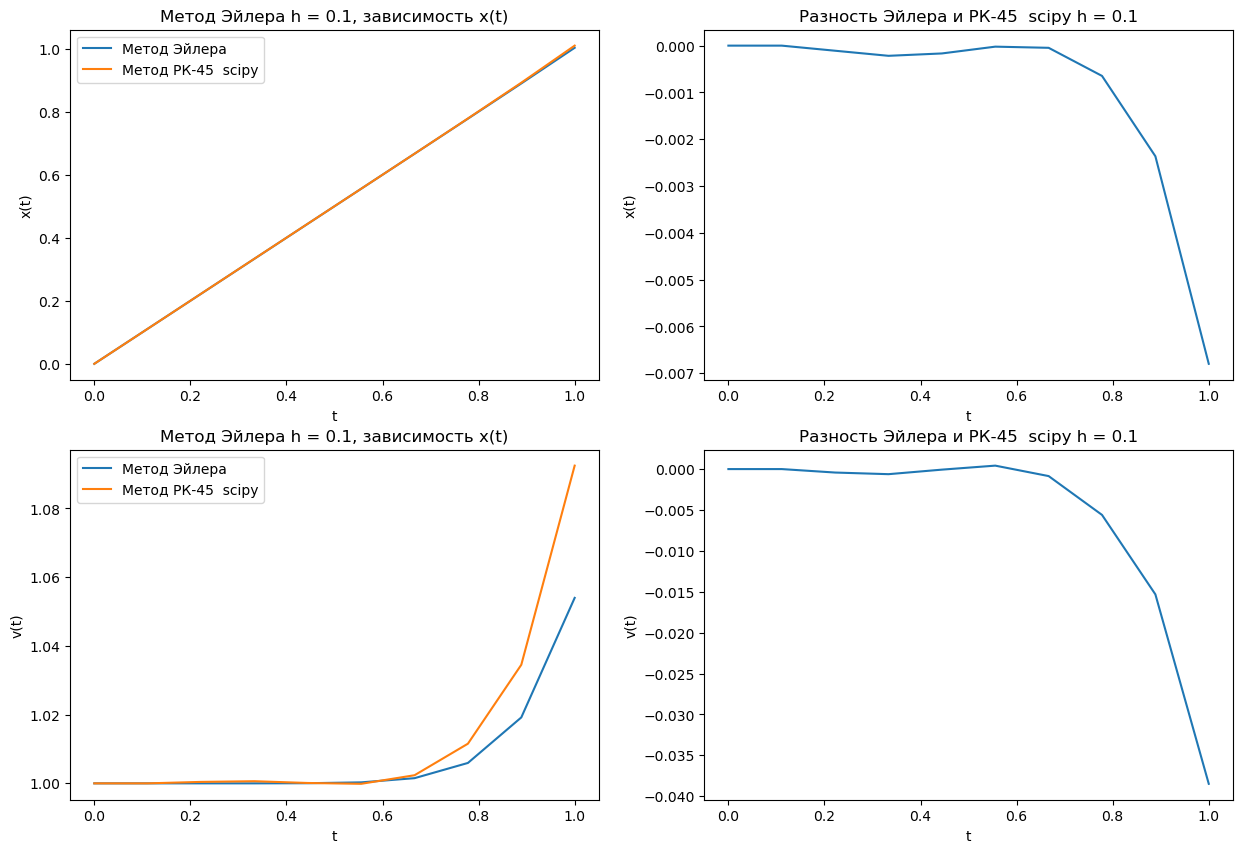

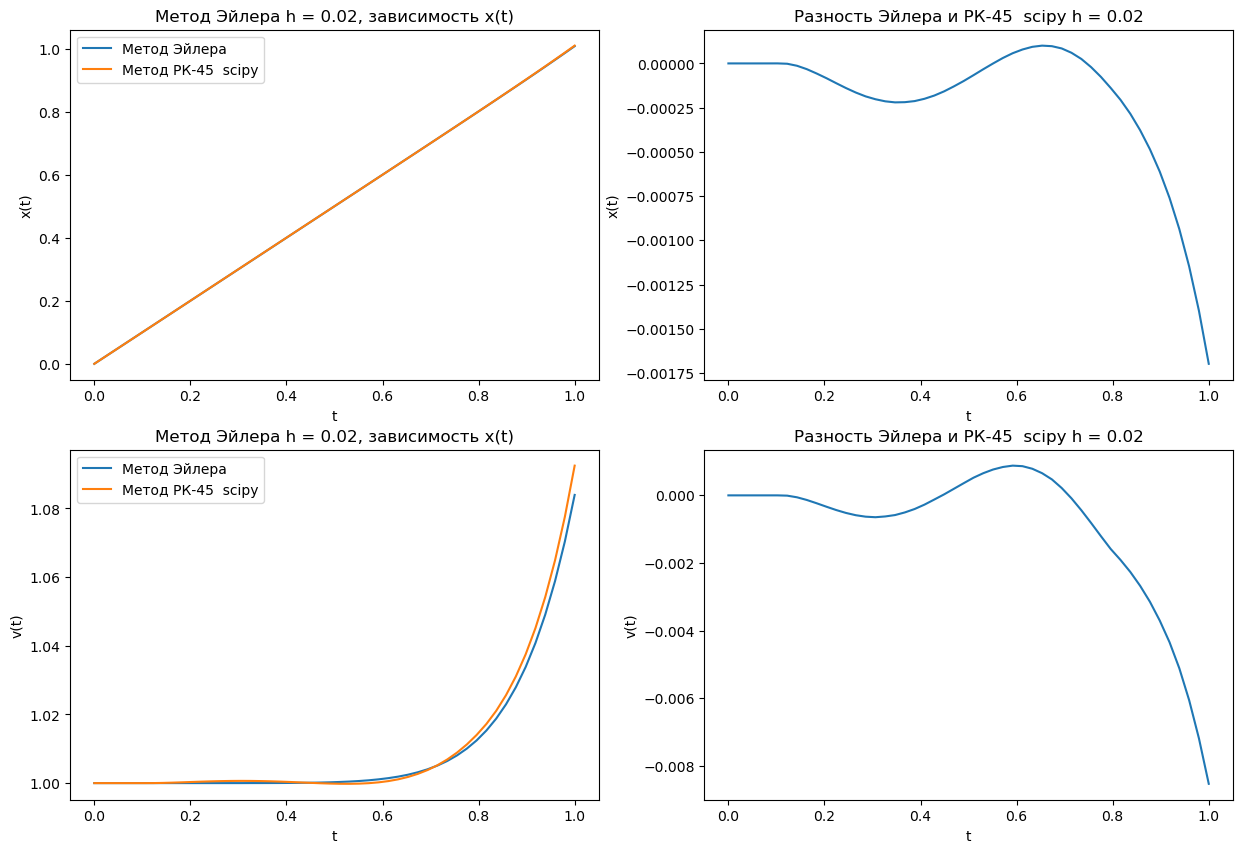

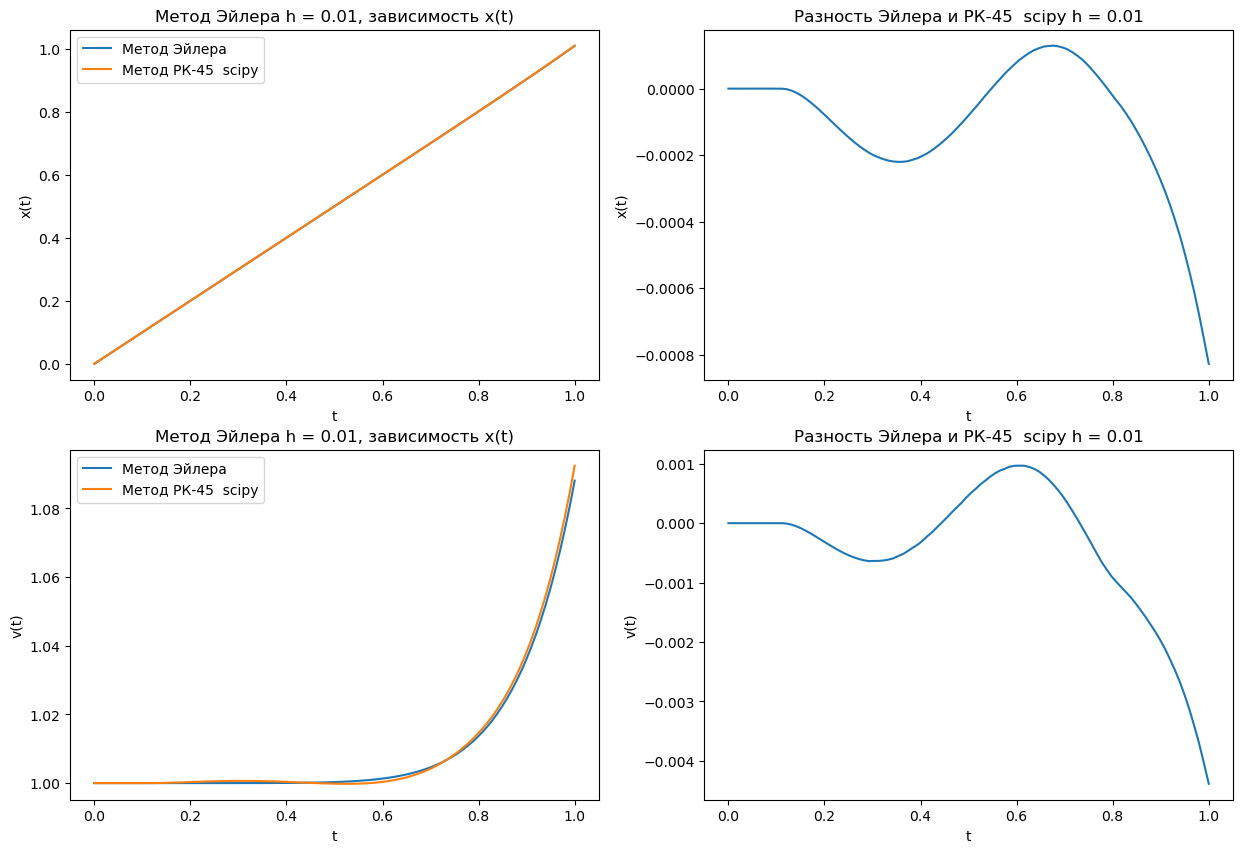

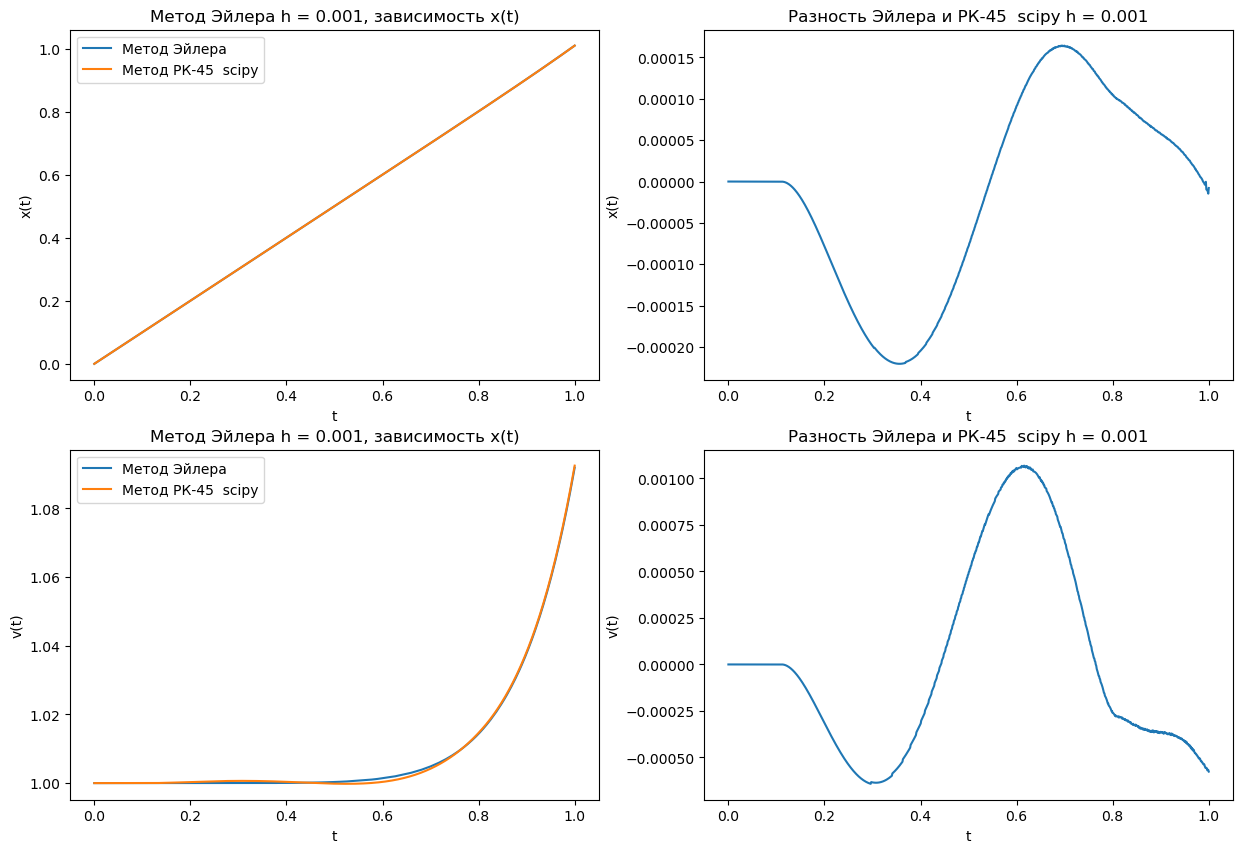

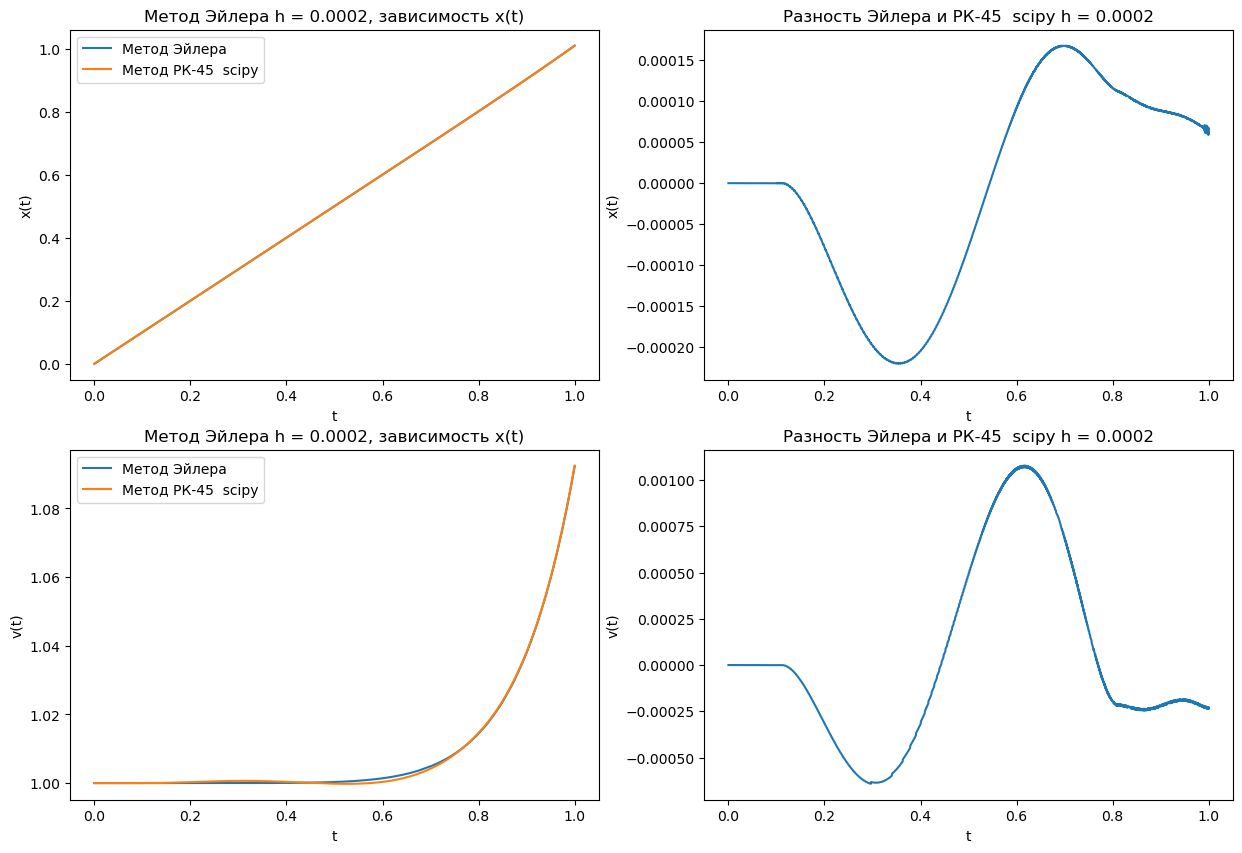

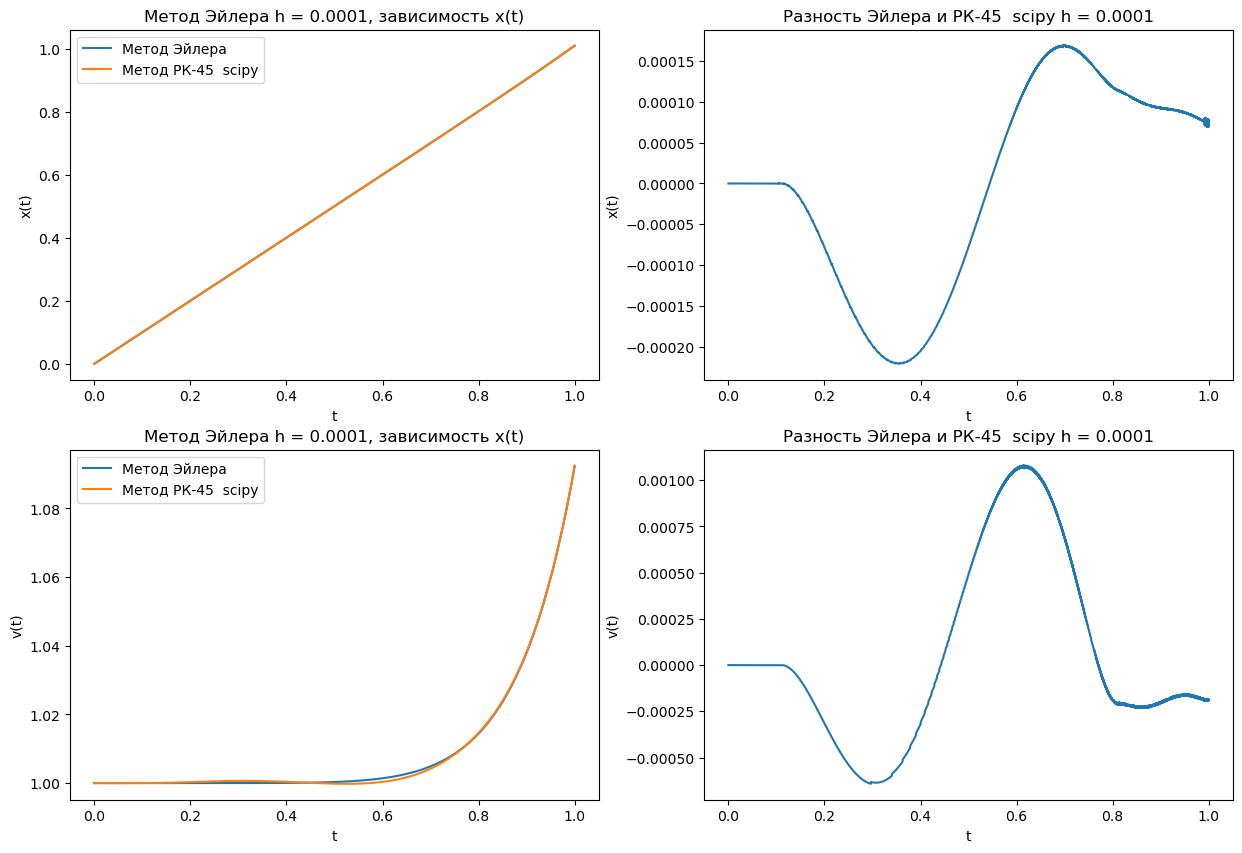

In [5]:
# Exercise 1 Euler Method
for n in n_arr:
    compare_method(get_my_solution(1, 1, n), "Эйлера", get_good_solution(n, a, b, y0), "РК-45  scipy", (b - a) / (n))

# for i in range(1, len(n_arr)):
#     print('Невязка между сетками {} и {} : {}'.format(n_arr[i-1], n_arr[i], get_disperancy(get_my_solution(1, 1, n_arr[i-1]), get_my_solution(1, 1, n_arr[i]))) )

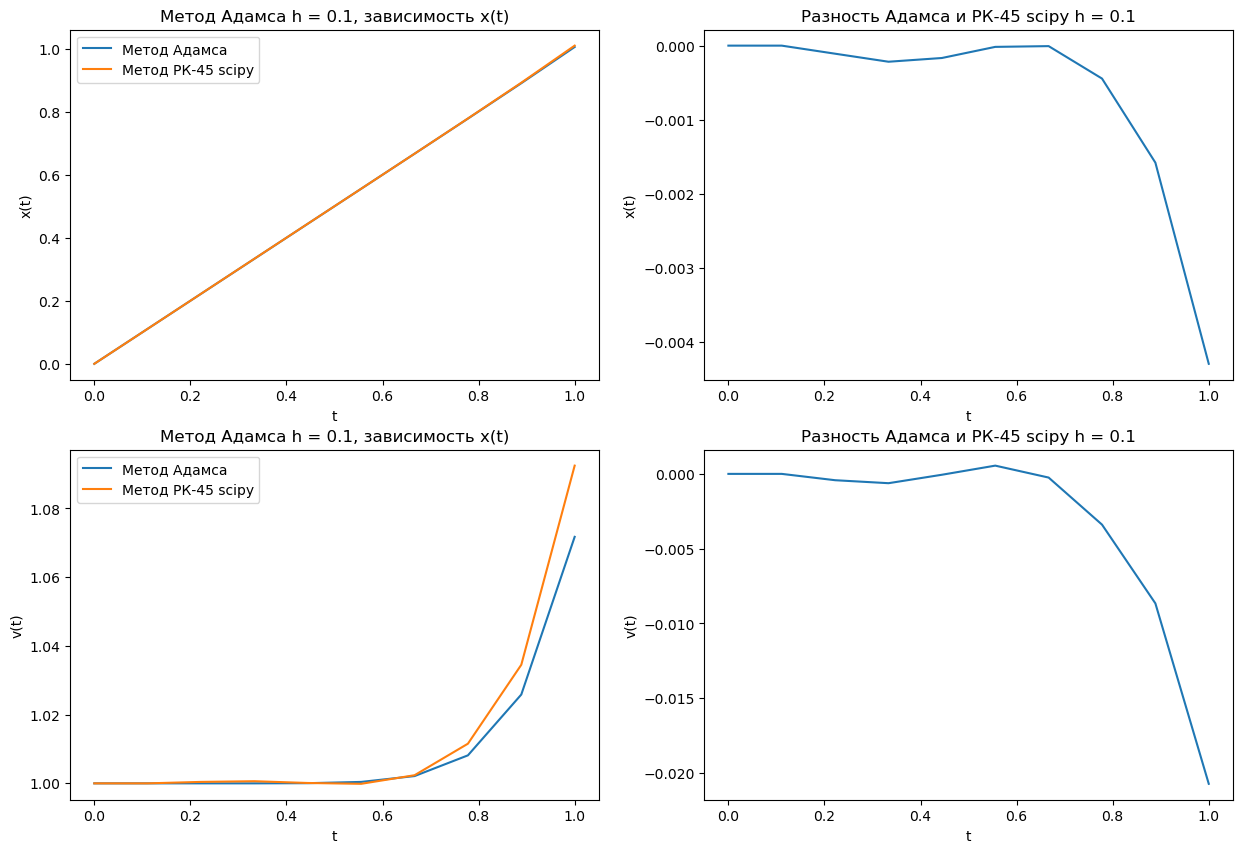

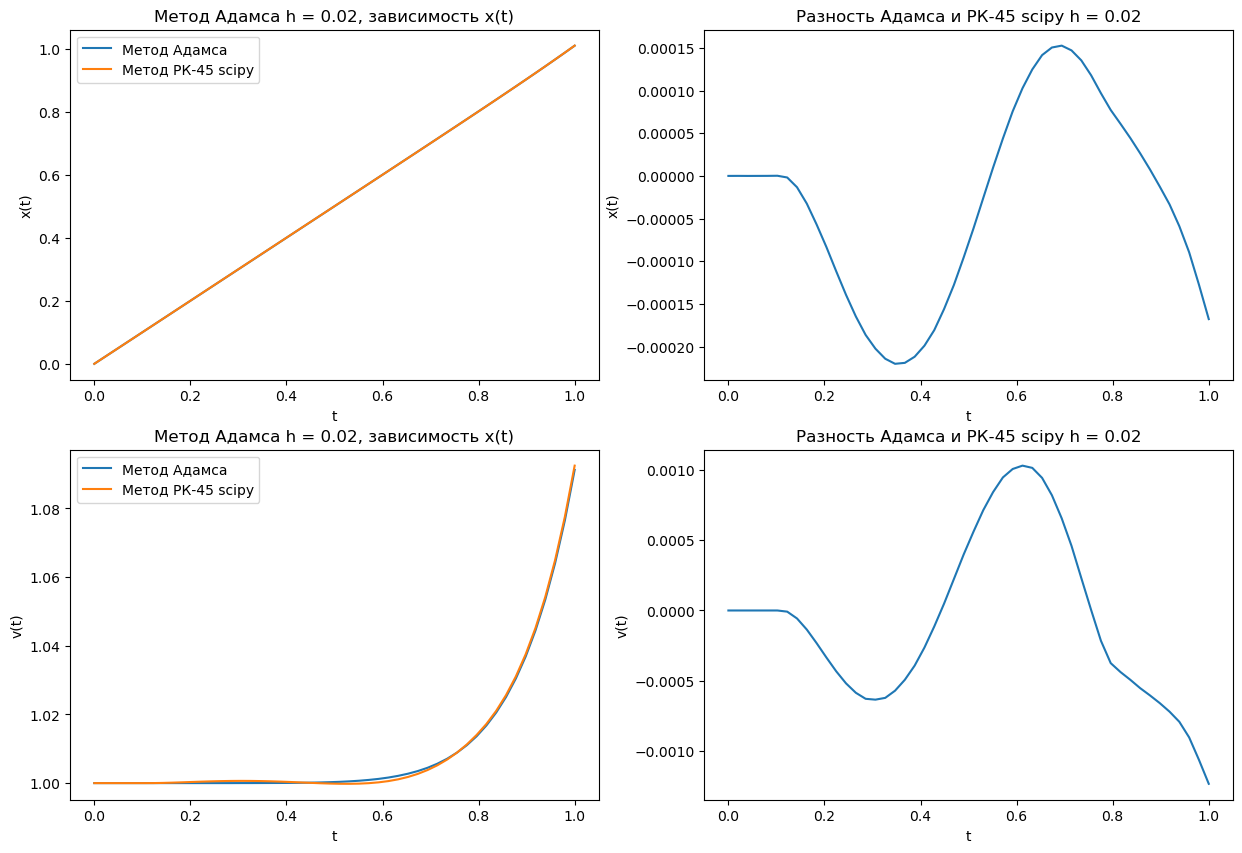

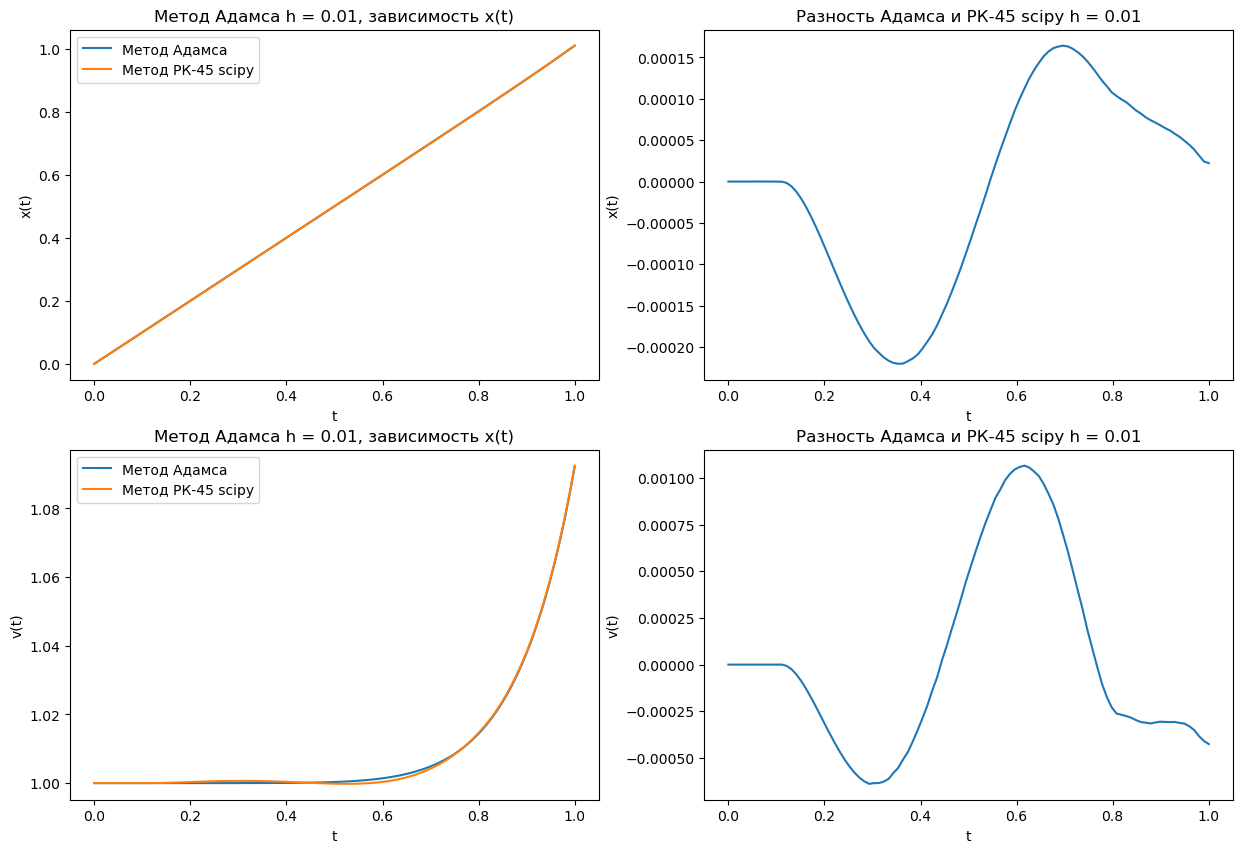

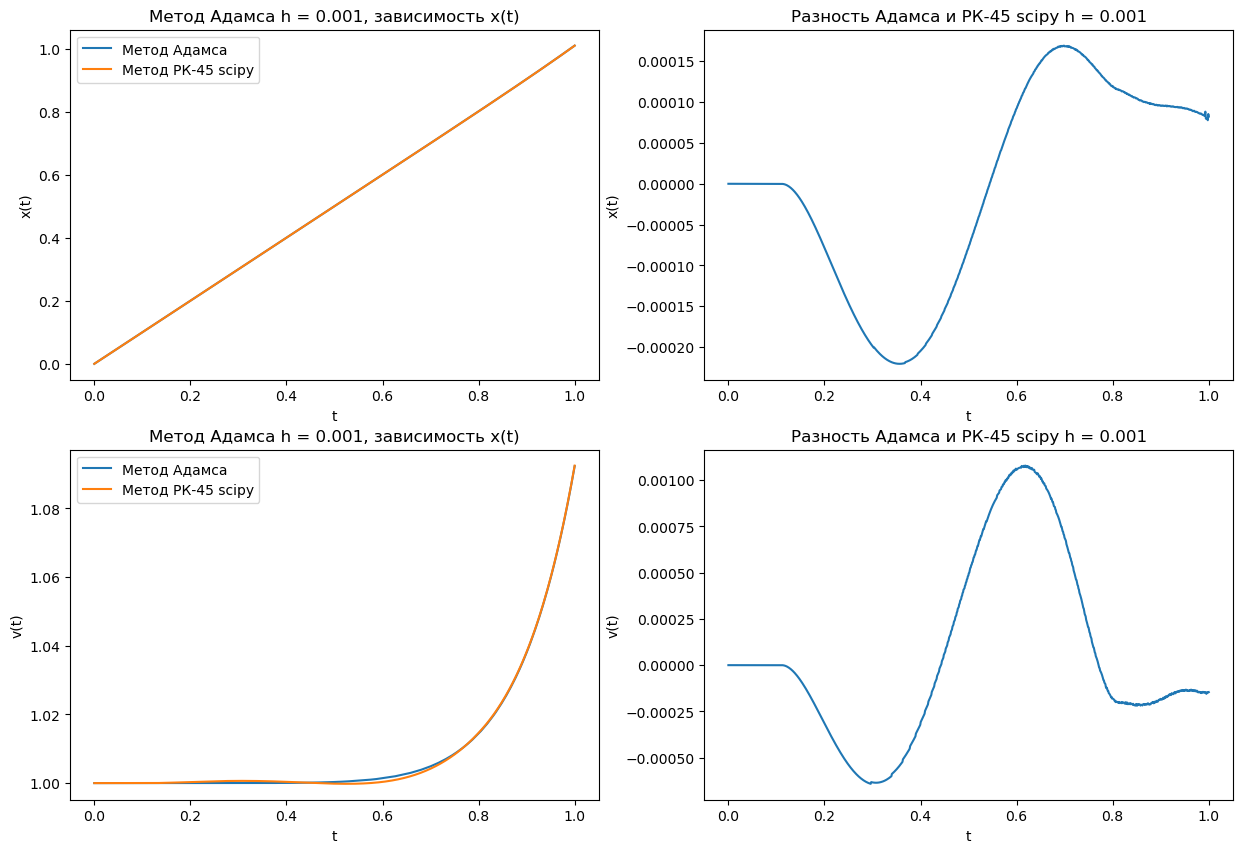

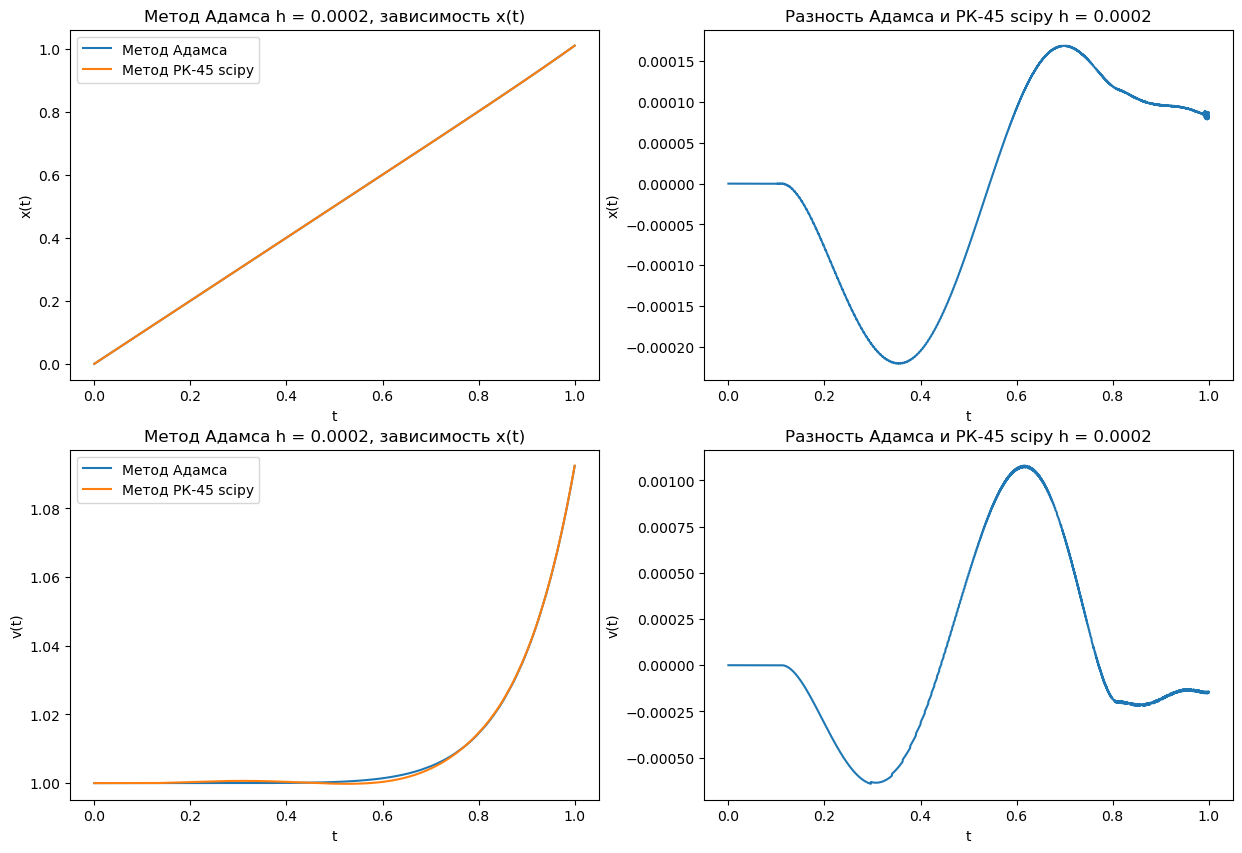

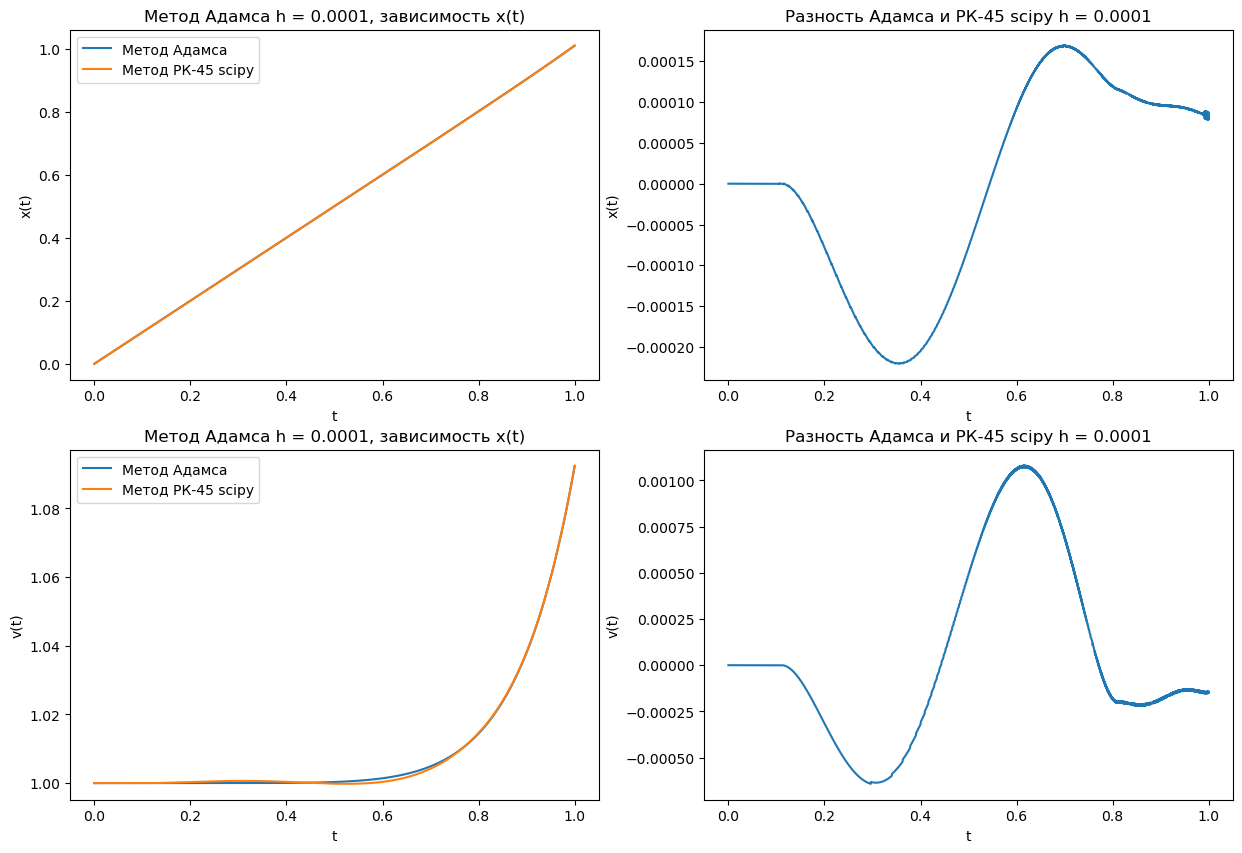

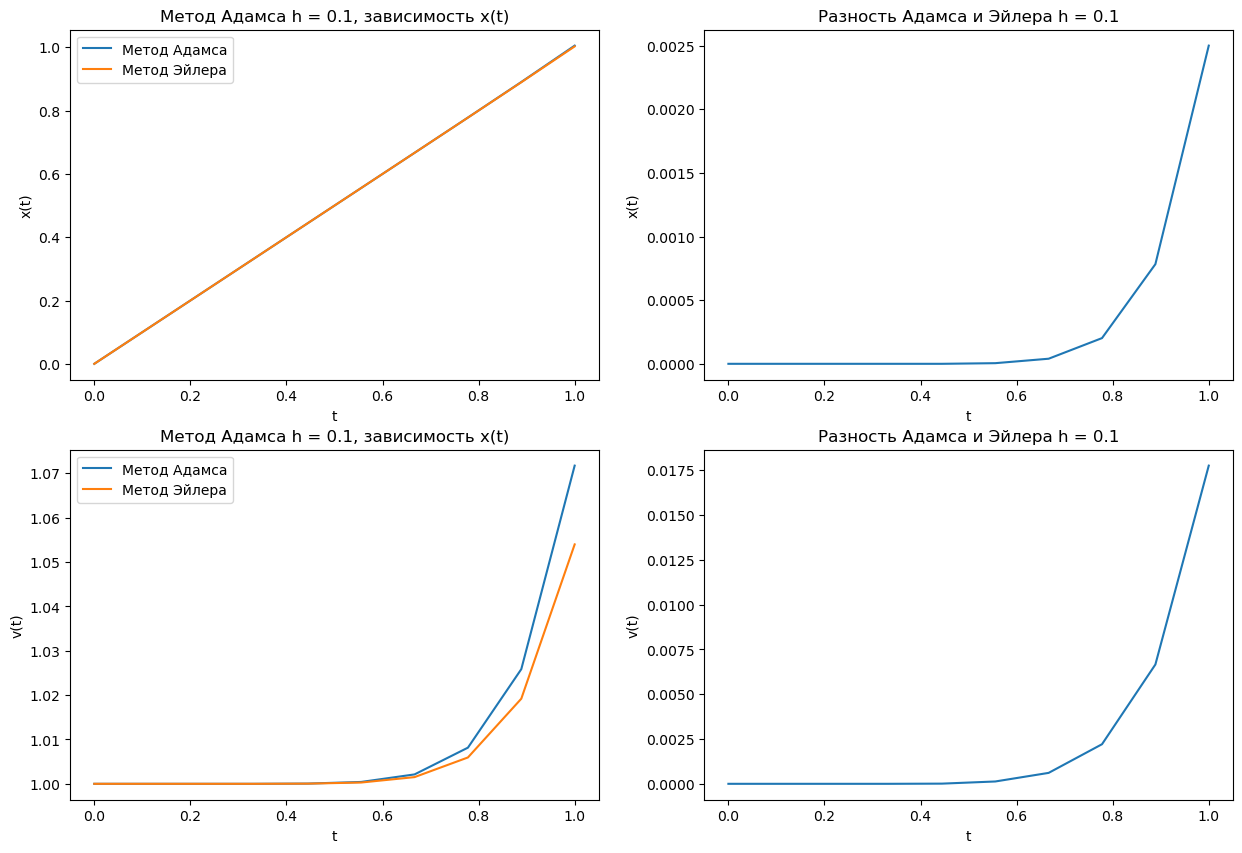

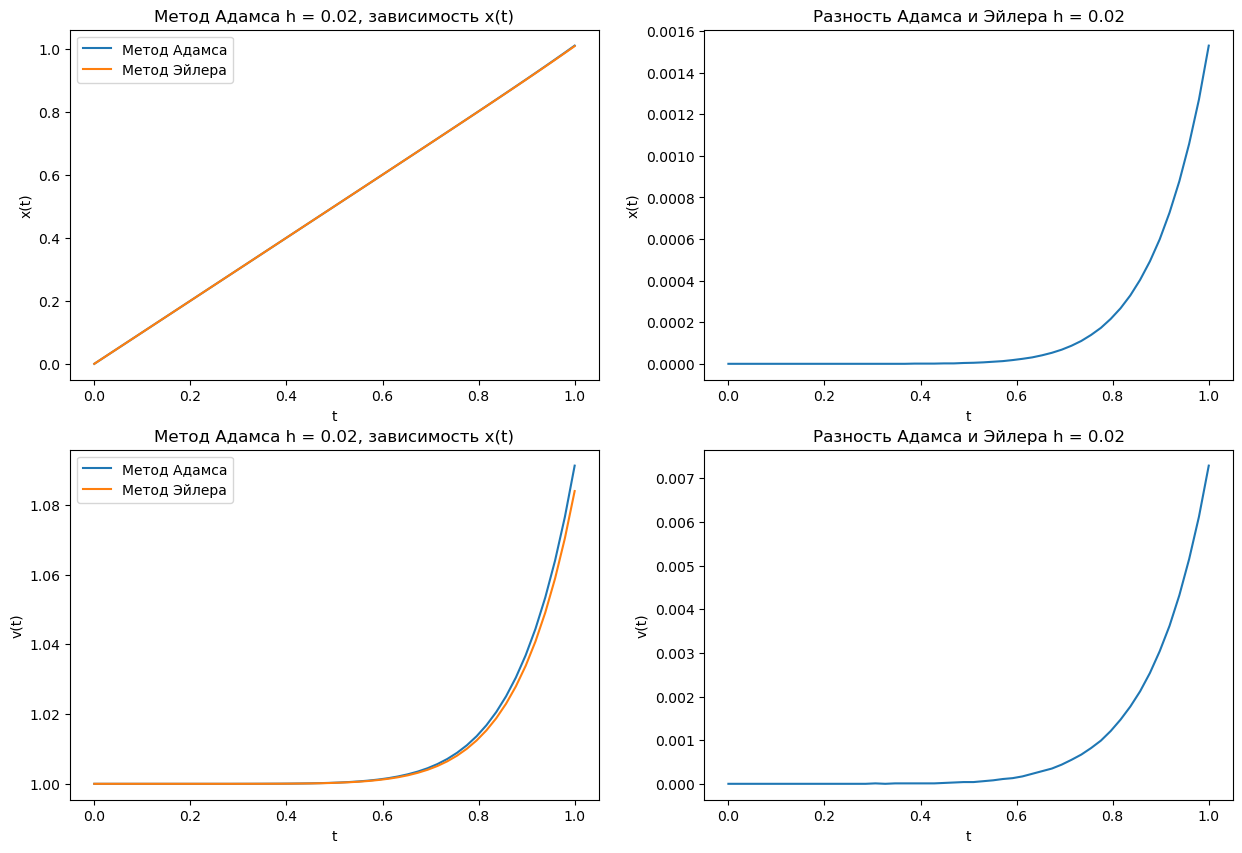

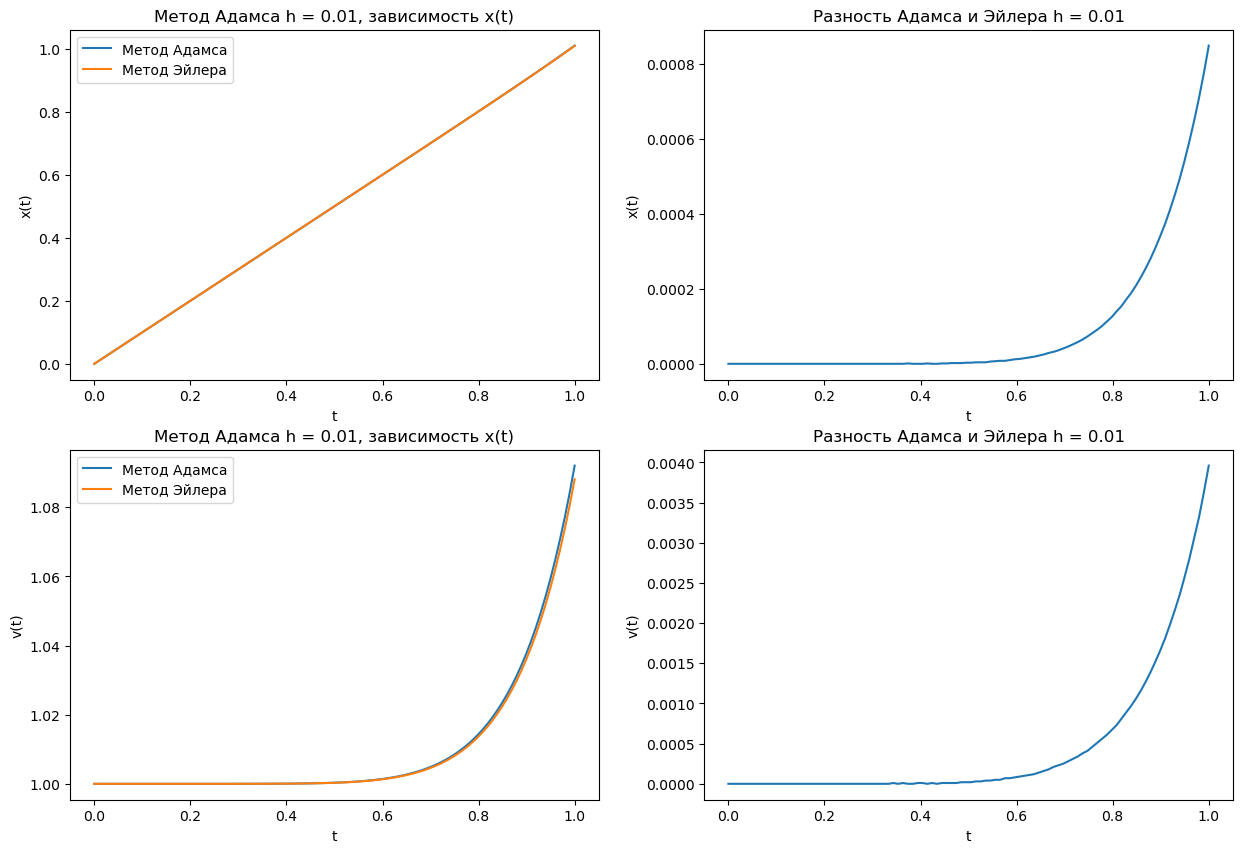

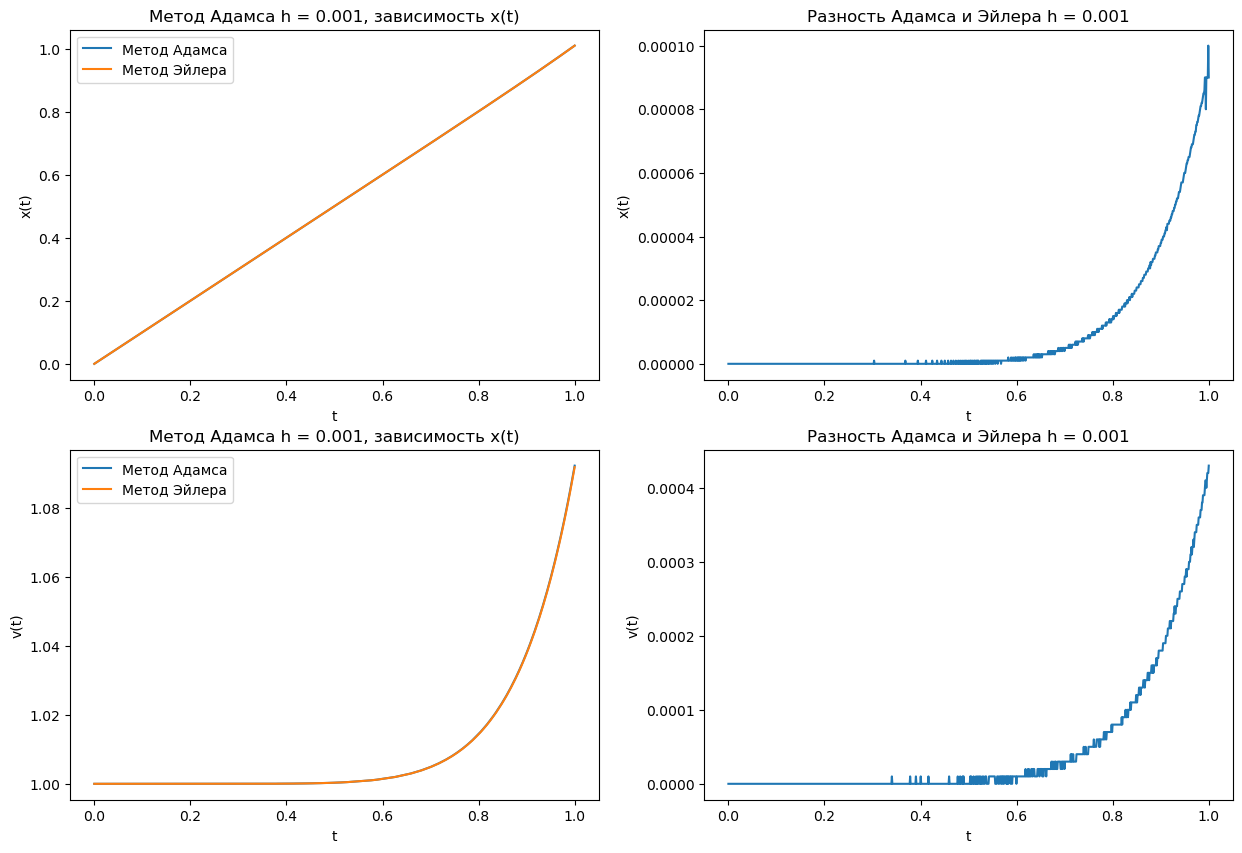

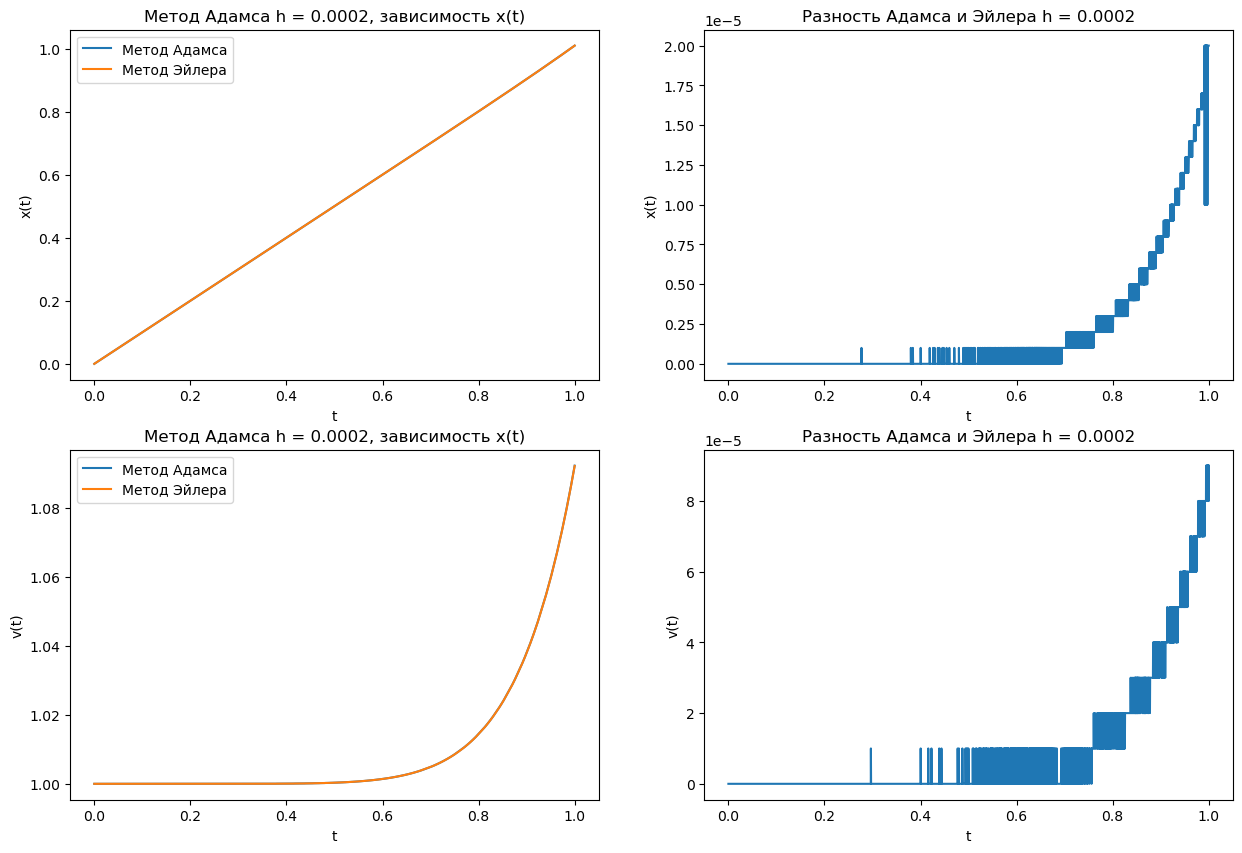

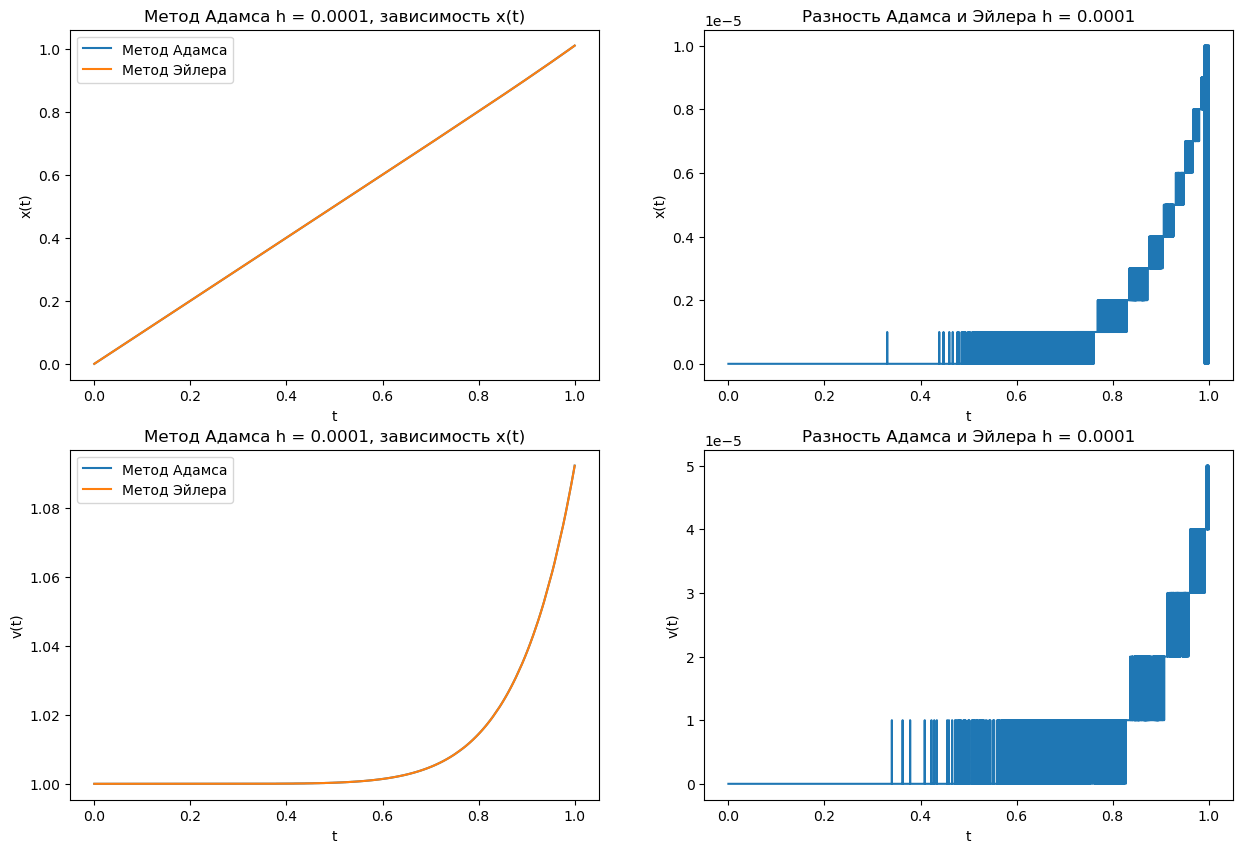

In [6]:
# Exercise 2 Adams Method
for n in n_arr:
    compare_method(get_my_solution(1, 2, n), "Адамса", get_good_solution(n, a, b, y0), "РК-45 scipy", (b - a) / n)
    
for n in n_arr:
    compare_method(get_my_solution(1, 2, n), "Адамса", get_my_solution(1, 1, n), "Эйлера", (b - a) / n)

# for i in range(1, len(n_arr)):
#     print('Невязка между сетками {} и {} : {}'.format(n_arr[i-1], n_arr[i], get_disperancy(get_my_solution(1, 2, n_arr[i-1]), get_my_solution(1, 2, n_arr[i]))) )

Невязка между сетками 10 и 100 : 7.440686780697129
Невязка между сетками 100 и 1000 : 0.361028042063217
Невязка между сетками 1000 и 10000 : 0.03222778143155368


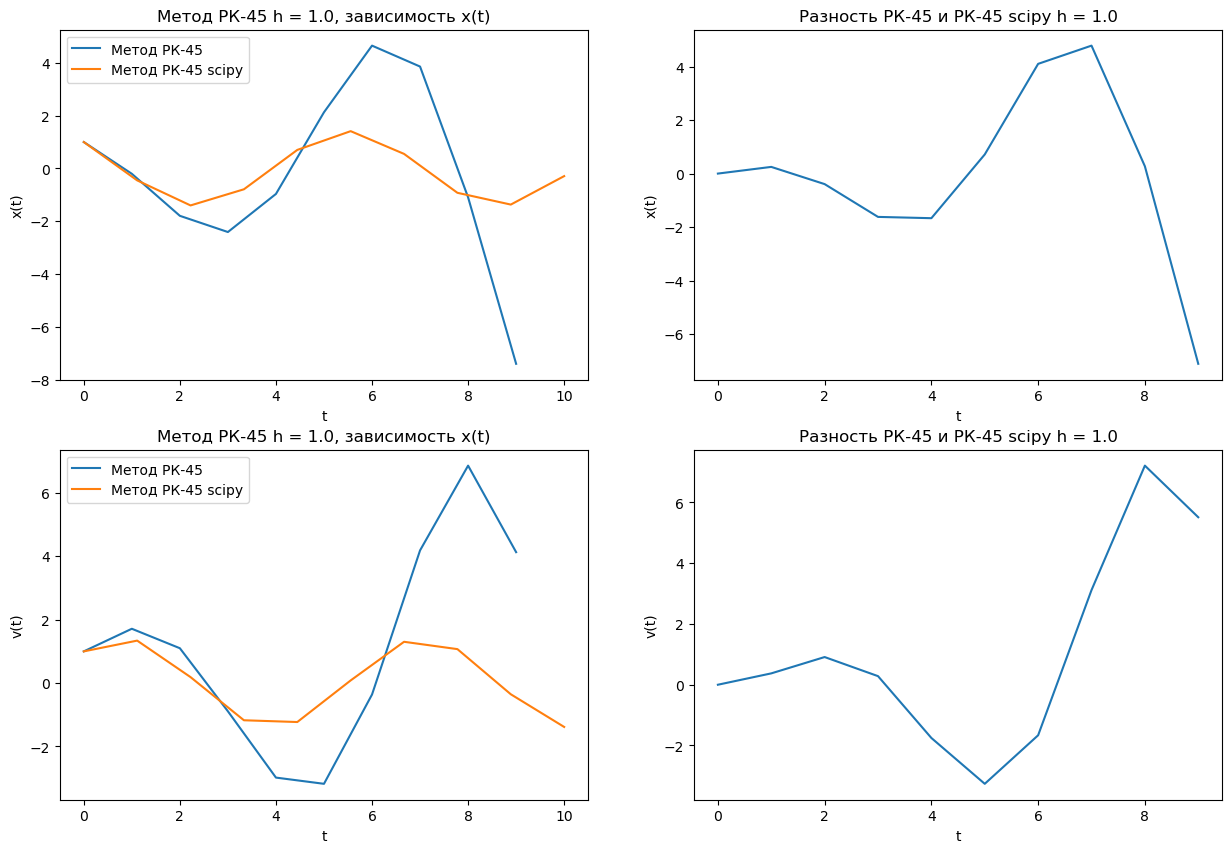

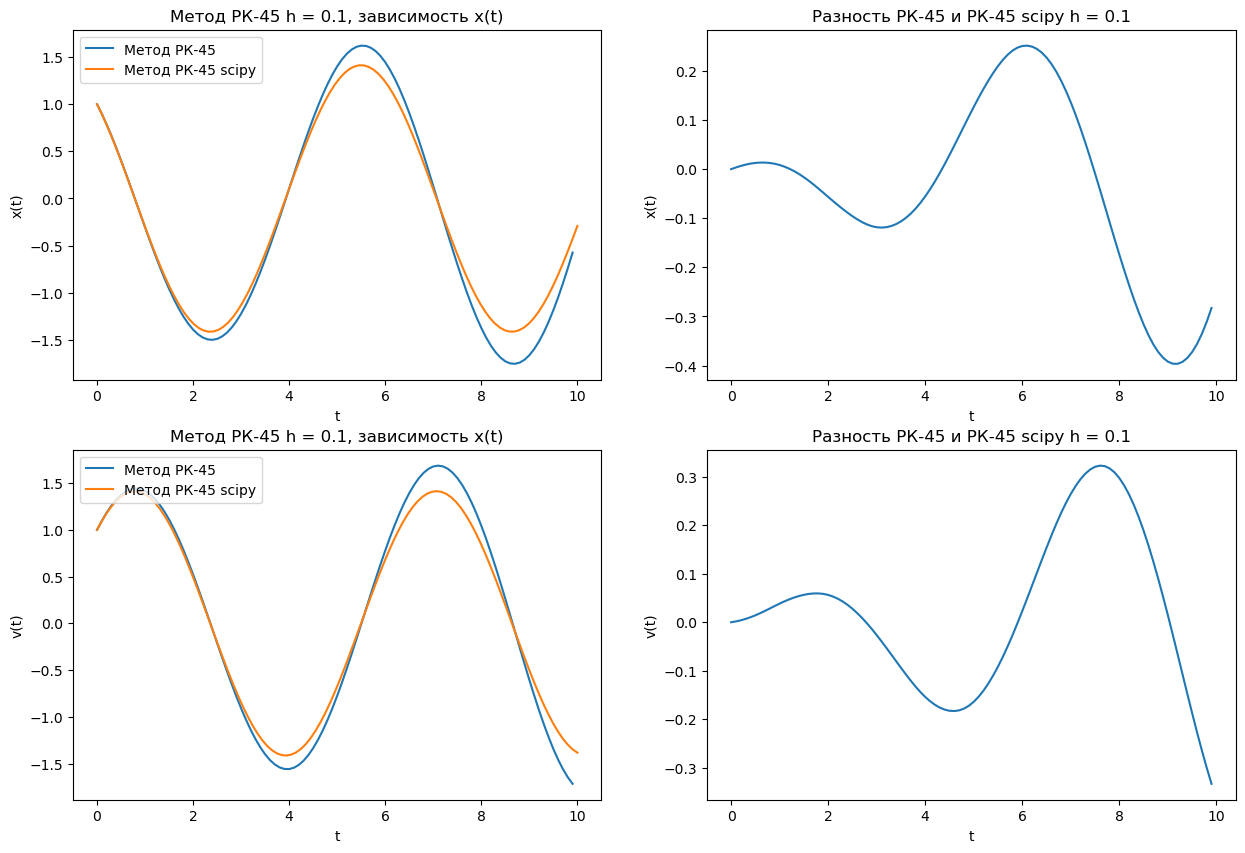

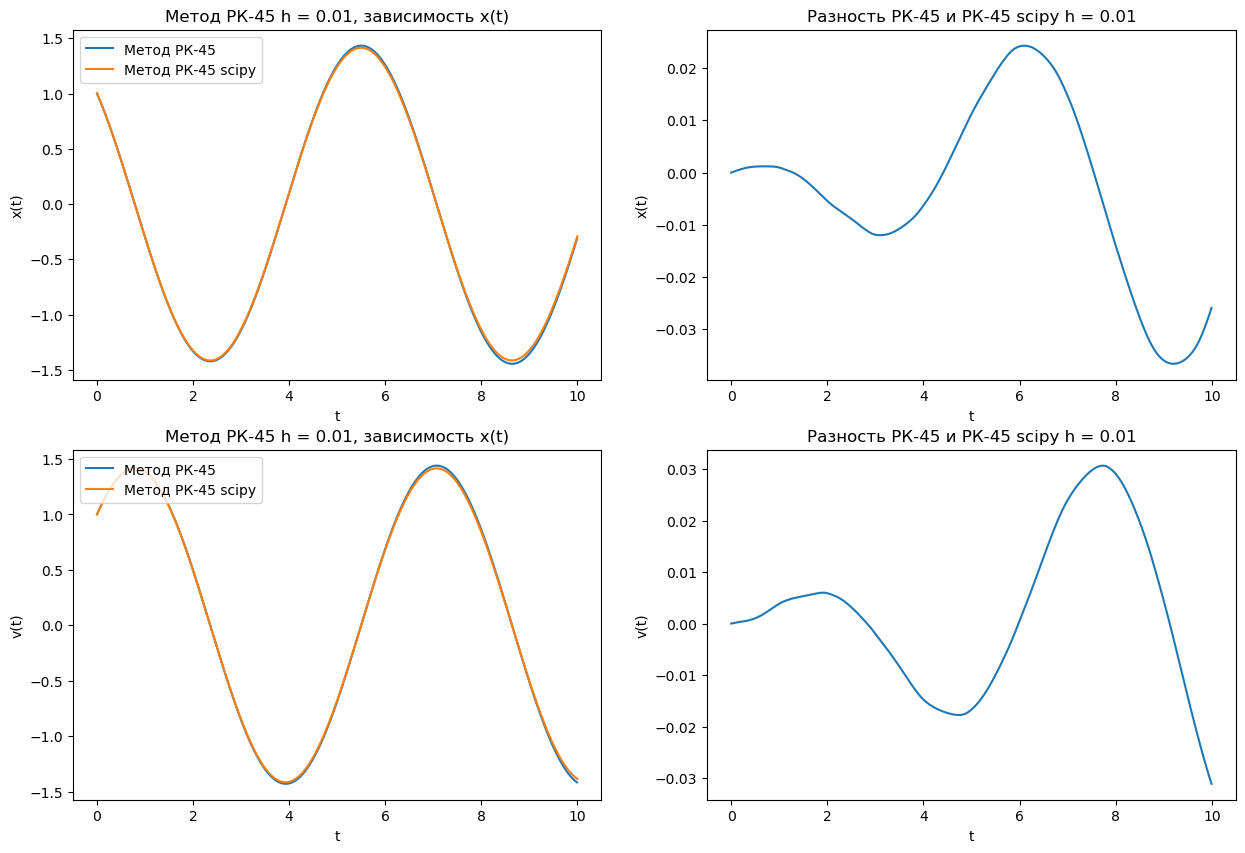

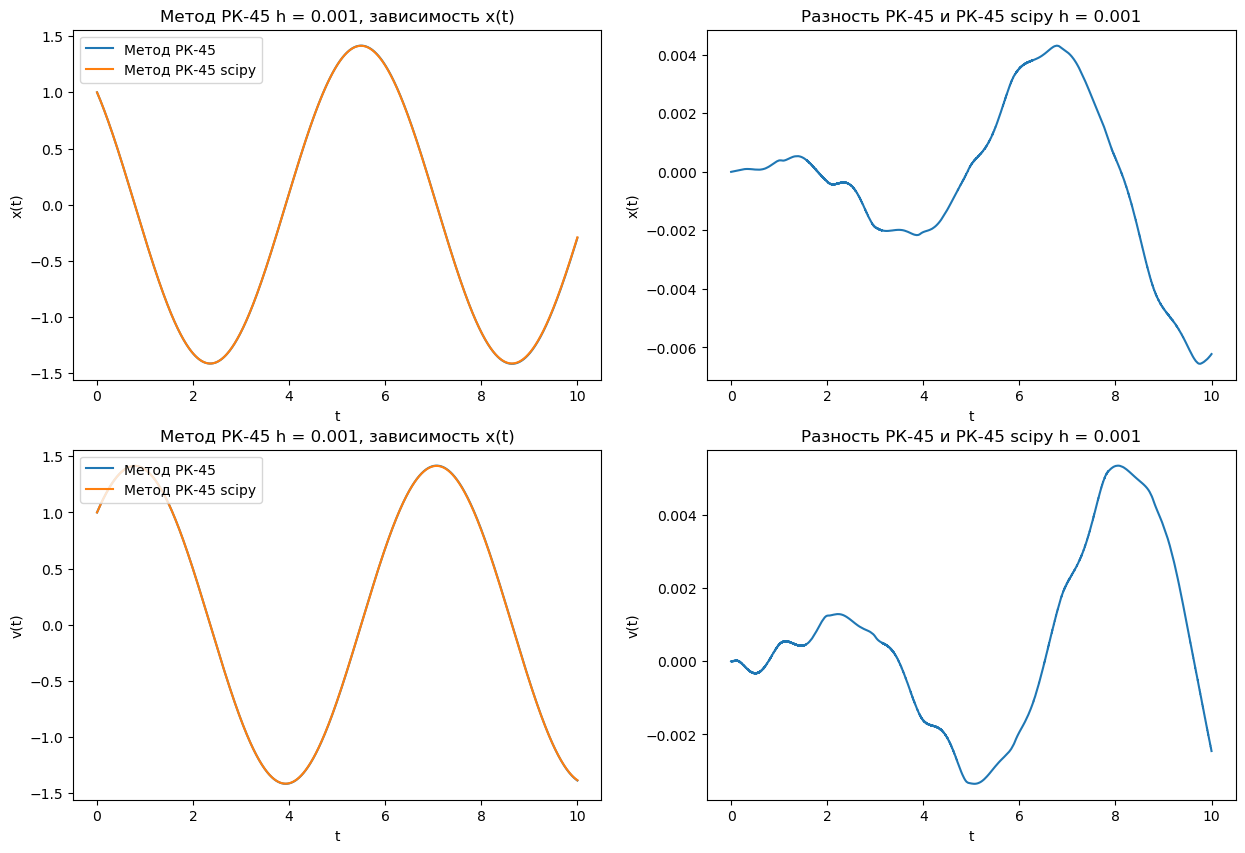

In [21]:
# Exercise 3 Runge-Kutta 4 order
for n in n_arr:
    compare_method(get_my_solution(1, 3, n), "РК-45", get_good_solution(n, a, b, y0), "РК-45 scipy", (b - a) / n)

for i in range(1, len(n_arr)):
    print('Невязка между сетками {} и {} : {}'.format(n_arr[i-1], n_arr[i], get_disperancy(get_my_solution(1, 3, n_arr[i-1]), get_my_solution(1, 3, n_arr[i]))) )

10
